## Task 1: Exploratory Data Analysis – Titanic Dataset

This task focuses on understanding the Titanic dataset, identifying key patterns that may influence passenger survival, and preparing the data for regression and classification tasks.

### Dataset Overview
- Data source: Seaborn Titanic dataset
- Includes passenger demographics, ticket class, fare, and survival outcome

### Cleaning and Preprocessing
- Dropped column: `deck` (too many missing values)
- Filled missing `age` with median
- Filled missing `embarked` with mode
- Removed passengers with zero `fare` values (unrealistic cases)
- Engineered features:
  - `family_size = sibsp + parch + 1`
  - `is_alone = 1` if passenger had no family aboard
  - `fare_q`: fare quartile globally
  - `fare_q_in_class`: fare quartile within each ticket class

### Visual Analysis
- Histogram of age
- Boxplot of fare (showing outliers)
- Barplots of survival by:
  - Sex
  - Passenger class (`pclass`)
  - Alone vs not alone
- Correlation heatmap of numeric variables
- Violin plot: `fare` distribution by `pclass`
- Survival barplots by:
  - Global fare quartiles (`fare_q`)
  - Fare quartiles within class (`fare_q_in_class`)

### Key Insights
1. Female passengers had a survival rate of 74%, compared to just 17% for males.
2. First-class passengers had a 63% survival rate, while only 24% of third-class passengers survived.
3. Passengers who were traveling alone had lower survival (30%) compared to those with family (51%).
4. Children under 15 had higher survival (58%) than young adults.
5. Passengers paying higher fares tended to survive more, especially within their respective ticket classes.
6. Even within the same `pclass`, fare is a differentiating survival factor — indicating that wealth or cabin location played a role.
7. Zero-fare passengers likely represented crew members or other non-standard cases and were removed to avoid skewed model training.
8. Age distribution is skewed right, with a concentration of survivors under age 40.
9. Strongest positive correlations with survival: `sex_female`, `pclass` (inverse), `fare`, and `family_size`.
10. Fare distributions vary drastically by `pclass` with little overlap — visually confirming class-based economic separation aboard the ship.


Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

deck           0.772166
age            0.198653
embarked       0.002245
embark_town    0.002245
sex            0.000000
dtype: float64


,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
family_size,891.0,1.904602,1.613459,1.00,1.0000,1.0000,2.0,11.0000
is_alone,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000


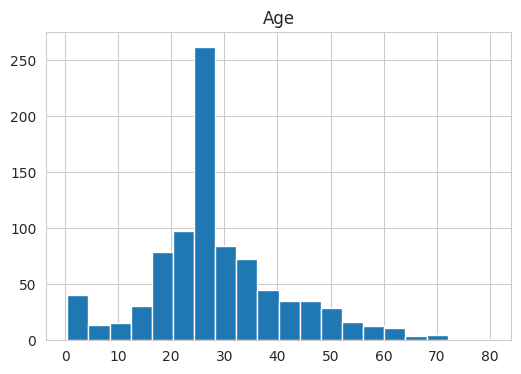

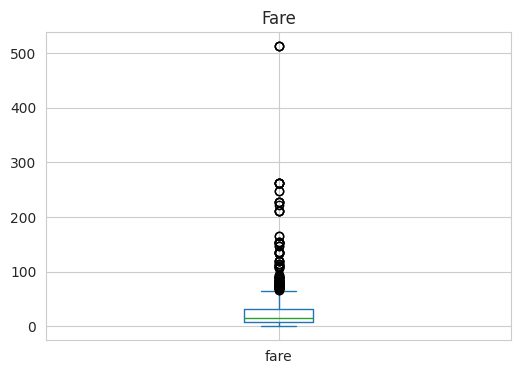

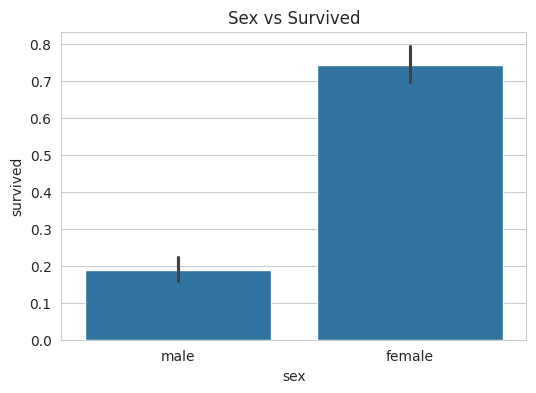

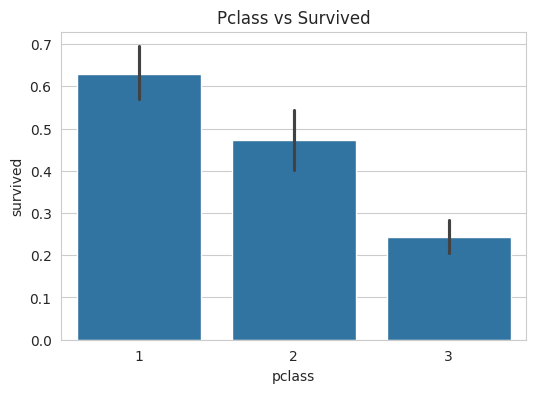

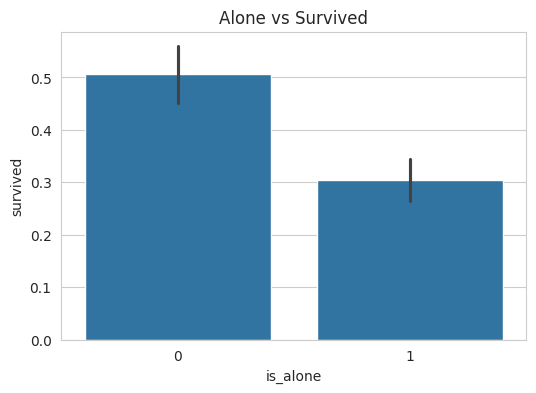

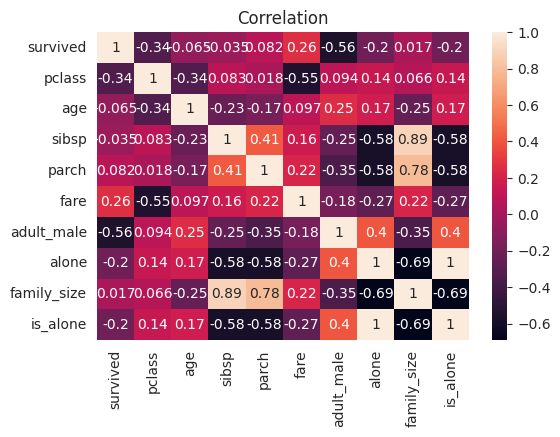

          min  median     max   mean
pclass                              
1        5.00   61.98  512.33  86.15
2       10.50   15.02   73.50  21.36
3        4.01    8.05   69.55  13.79 

Rows after 0 values drop: 876


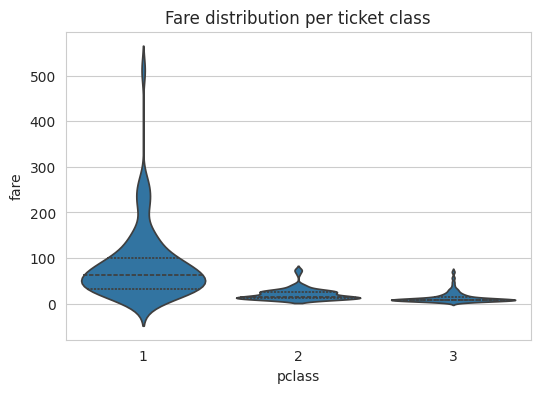

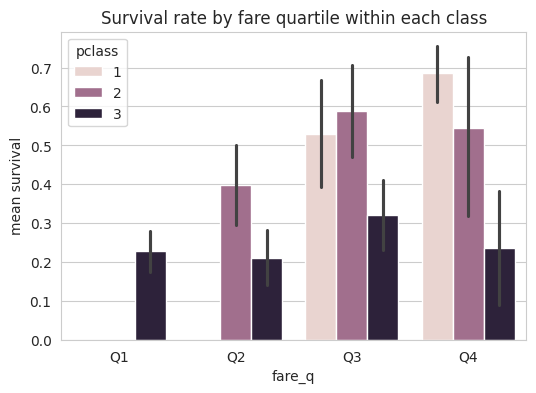

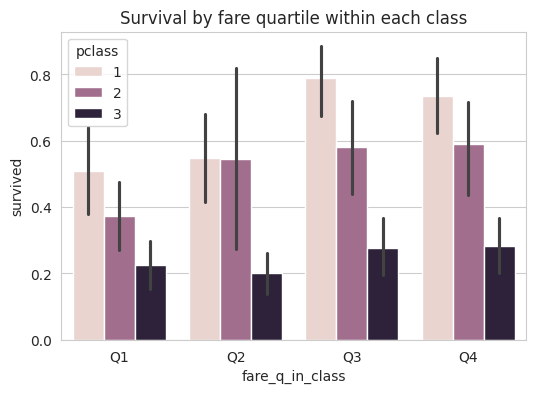

In [34]:
import warnings, pandas as pd
pd.options.mode.chained_assignment = None

warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
sns.set_style("whitegrid")

df = sns.load_dataset("titanic")

print("Shape:", df.shape)
display(df.head())
display(df.info())
print(df.isna().mean().sort_values(ascending=False).head())

df.drop(columns=["deck"], inplace=True)
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

df["family_size"] = df["sibsp"] + df["parch"] + 1
df["is_alone"]    = (df["family_size"] == 1).astype(int)

display(df.describe().T)

df["age"].hist(bins=20);   plt.title("Age");   plt.show()
df["fare"].plot.box();     plt.title("Fare");  plt.show()

sns.barplot(x="sex",   y="survived", data=df); plt.title("Sex vs Survived");   plt.show()
sns.barplot(x="pclass",y="survived", data=df); plt.title("Pclass vs Survived");plt.show()
sns.barplot(x="is_alone",y="survived", data=df); plt.title("Alone vs Survived");plt.show()
sns.heatmap(df.corr(numeric_only=True), annot=True); plt.title("Correlation"); plt.show()
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
sns.set_style("whitegrid")

df = sns.load_dataset("titanic").copy()

df = df.drop(columns="deck")
df["age"]      = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

df = df[df["fare"] > 0]

fare_stats = df.groupby("pclass")["fare"].agg(["min","median","max","mean"]).round(2)
print(fare_stats, "\n")

print("Rows after 0 values drop:", df.shape[0])

df["fare_q"] = pd.qcut(df["fare"], 4, labels=["Q1","Q2","Q3","Q4"])
sns.violinplot(x="pclass", y="fare", data=df, inner="quartile", scale="width")
plt.title("Fare distribution per ticket class")
plt.show()

sns.barplot(x="fare_q", y="survived", hue="pclass", data=df)
plt.title("Survival rate by fare quartile within each class")
plt.ylabel("mean survival")
plt.show()
df["fare_q_in_class"] = (df
        .groupby("pclass")["fare"]
        .transform(lambda x: pd.qcut(x, 4, labels=["Q1","Q2","Q3","Q4"])))

sns.barplot(x="fare_q_in_class", y="survived", hue="pclass", data=df)
plt.title("Survival by fare quartile within each class")
plt.show()

## Task 2: Regression – Predicting Titanic Fare

In this task, we perform regression to **predict the fare paid by a Titanic passenger** based on various features.

### Dataset: Titanic
We continue using the Titanic dataset from Task 1.

### Target Variable
- **`fare`** – A continuous variable representing the ticket price (in £)

### Feature Sets Compared
- **Simple:** `pclass`
- **Multiple:** `pclass`, `age`, `sex_male`, `is_alone`
- **Polynomial:** `pclass`, `age` with polynomial interactions

### Models Used
1. **Linear Regression (from scratch)** using Gradient Descent  
2. **Linear Regression (scikit-learn)**  
3. **Polynomial Regression (scikit-learn)**

### Evaluation
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Actual vs Predicted plots
- Residual plots
- Bar chart comparing model performance

### Preprocessing
- Filled missing `age` and `embarked`
- Dropped `deck`
- Engineered `family_size`, `is_alone`
- Removed or capped outliers in `fare`


Simple   | GD MSE= 1721.856 | SK-learn RMSE ≈ £40.9
Multiple | GD MSE= 1610.904 | SK-learn RMSE ≈ £39.8
Poly     | GD MSE= 1699.223 | SK-learn RMSE ≈ £38.8


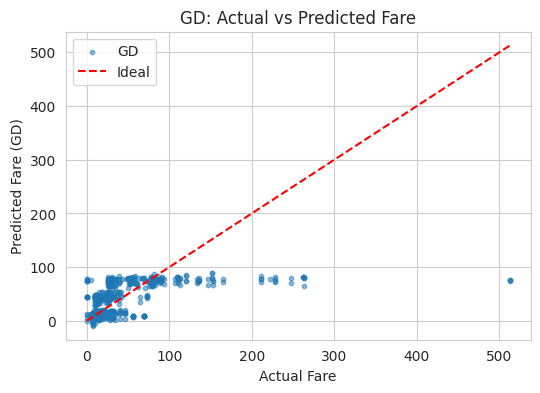

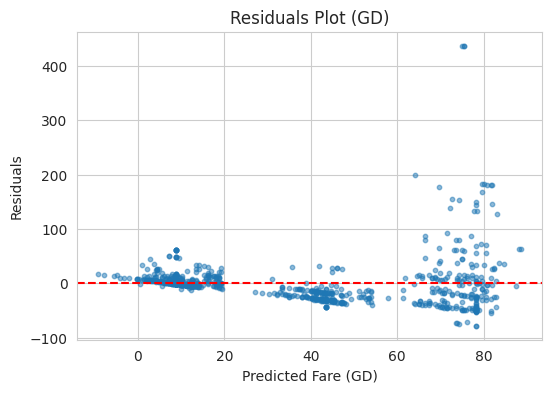

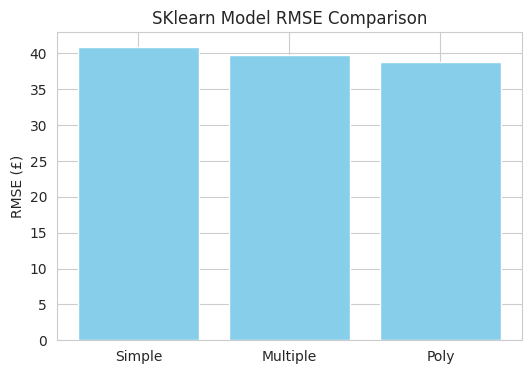

In [33]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

df = sns.load_dataset("titanic")
# df = df[df["fare"] < df["fare"].quantile(0.99)]

df.drop(columns=["deck"], inplace=True)
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

df["family_size"] = df["sibsp"] + df["parch"] + 1
df["is_alone"] = (df["family_size"] == 1).astype(int)
df = pd.get_dummies(df, columns=["sex", "embarked"], drop_first=True)

df = df.dropna(subset=["fare", "age"])

class GDRegressor:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.theta = np.zeros(X.shape[1])
        for _ in range(self.n_iter):
            gradients = 2/X.shape[0] * X.T.dot(X.dot(self.theta) - y)
            self.theta -= self.lr * gradients

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(self.theta)

def evaluate_model(X, y, model):
    scores = -cross_val_score(model, X, y, cv=5, scoring="neg_root_mean_squared_error")
    return scores.mean()
y = df["fare"]

features = {
    "simple": ["pclass"],
    "multiple": ["pclass", "age", "sex_male", "is_alone"],
    "poly": ["pclass", "age"]
}

for name, cols in features.items():
    X = df[cols]

    # Gradient Descent
    gd_model = GDRegressor(lr=0.001, n_iter=10000)
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    gd_model.fit(X_scaled, y.values.astype(float))
    y_pred_gd = gd_model.predict(X_scaled)

    mse_gd = mean_squared_error(y, y_pred_gd)

    if name == "poly":
        pipe = make_pipeline(PolynomialFeatures(2), LinearRegression())
    else:
        pipe = LinearRegression()
    mse_sk = evaluate_model(X, y, pipe)

    print(f"{name.capitalize():8s} | GD MSE= {mse_gd:.3f} | SK-learn RMSE ≈ £{mse_sk:.1f}")

plt.figure(figsize=(6,4))
plt.scatter(y, y_pred_gd, alpha=0.5, label="GD", s=10)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal")
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare (GD)")
plt.legend()
plt.title("GD: Actual vs Predicted Fare")
plt.show()

residuals = y - y_pred_gd
plt.figure(figsize=(6,4))
plt.scatter(y_pred_gd, residuals, alpha=0.5, s=10)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Fare (GD)")
plt.ylabel("Residuals")
plt.title("Residuals Plot (GD)")
plt.show()

model_names = ["Simple", "Multiple", "Poly"]
sklearn_rmse = [40.9, 39.8, 38.8]

plt.bar(model_names, sklearn_rmse, color='skyblue')
plt.ylabel("RMSE (£)")
plt.title("SKlearn Model RMSE Comparison")
plt.show()

## Task 3: Classification – Titanic Survival Prediction

In this task, we classify **whether a Titanic passenger survived** (`survived = 1`) or not (`survived = 0`) based on several features.

### Dataset: Titanic
We're using the same Titanic dataset from Task 1.

### Target Variable
- **`survived`** – Binary classification target:
  - `1`: Passenger survived
  - `0`: Passenger did not survive

### Features Used
We use different sets of features to train and compare models:

- **Simple:** `pclass`
- **Multiple:** `pclass`, `age`, `sex_male`, `is_alone`
- **Polynomial (extended):** `pclass`, `age`, `family_size`, `sex_male`

### Models Compared
1. **Logistic Regression** (from scratch)
2. **Logistic Regression (scikit-learn)**
3. **Decision Tree Classifier (scikit-learn)**

### Evaluation
- Classification reports (precision, recall, F1-score)
- Confusion matrices
- Grid search for hyperparameter tuning



SIMPLE | Scratch
              precision    recall  f1-score   support

           0       0.69      0.85      0.77       549
           1       0.63      0.40      0.49       342

    accuracy                           0.68       891
   macro avg       0.66      0.63      0.63       891
weighted avg       0.67      0.68      0.66       891

SIMPLE | SKLearn - Logistic
              precision    recall  f1-score   support

           0       0.69      0.85      0.77       549
           1       0.63      0.40      0.49       342

    accuracy                           0.68       891
   macro avg       0.66      0.63      0.63       891
weighted avg       0.67      0.68      0.66       891

SIMPLE | SKLearn - Tree
              precision    recall  f1-score   support

           0       0.69      0.85      0.77       549
           1       0.63      0.40      0.49       342

    accuracy                           0.68       891
   macro avg       0.66      0.63      0.63       891
weig

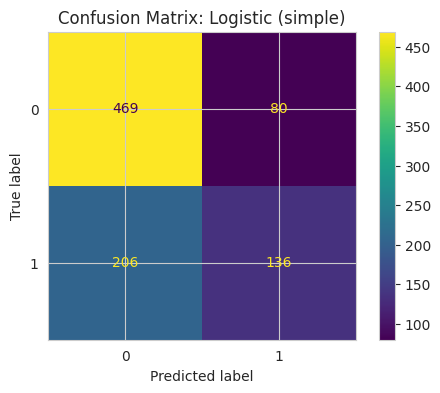


MULTIPLE | Scratch
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891

MULTIPLE | SKLearn - Logistic
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       549
           1       0.72      0.72      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891

MULTIPLE | SKLearn - Tree
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.78      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       89

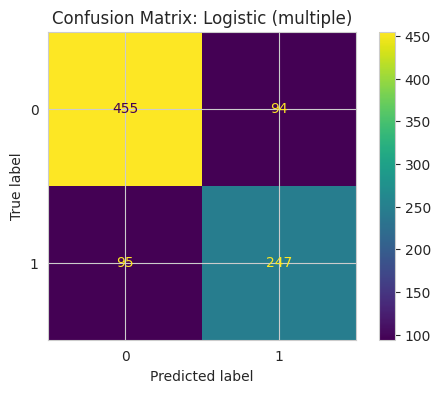


POLY | Scratch
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       549
           1       0.75      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891

POLY | SKLearn - Logistic
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       549
           1       0.74      0.71      0.73       342

    accuracy                           0.80       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.80      0.79       891

POLY | SKLearn - Tree
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       549
           1       0.81      0.71      0.76       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.81       891
weighted a

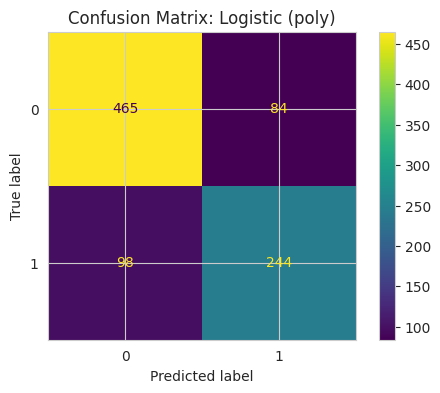

Best tuned logistic regression: {'C': 10}


In [32]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

df = sns.load_dataset("titanic")
df.drop(columns=["deck"], inplace=True)
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
df["family_size"] = df["sibsp"] + df["parch"] + 1
df["is_alone"] = (df["family_size"] == 1).astype(int)
df = pd.get_dummies(df, columns=["sex", "embarked"], drop_first=True)
df.dropna(subset=["fare", "age"], inplace=True)

y = df["survived"].values.astype(int)
features = {
    "simple": ["pclass"],
    "multiple": ["pclass", "age", "sex_male", "is_alone"],
    "poly": ["pclass", "age", "family_size", "sex_male"]
}

class LogisticRegressionScratch:
    def __init__(self, lr=0.01, n_iter=10000):
        self.lr = lr
        self.n_iter = n_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.theta = np.zeros(X.shape[1])
        for _ in range(self.n_iter):
            z = X.dot(self.theta)
            gradient = X.T.dot(self.sigmoid(z) - y) / y.size
            self.theta -= self.lr * gradient

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return (self.sigmoid(X.dot(self.theta)) >= 0.5).astype(int)

for name, cols in features.items():
    X = df[cols].values.astype(float)

    print(f"\n{name.upper()} | Scratch")
    model = LogisticRegressionScratch()
    model.fit(X, y)
    y_pred = model.predict(X)
    print(classification_report(y, y_pred))

    print(f"{name.upper()} | SKLearn - Logistic")
    clf1 = LogisticRegression(max_iter=1000).fit(X, y)
    print(classification_report(y, clf1.predict(X)))

    print(f"{name.upper()} | SKLearn - Tree")
    clf2 = DecisionTreeClassifier(max_depth=3).fit(X, y)
    print(classification_report(y, clf2.predict(X)))

    ConfusionMatrixDisplay.from_estimator(clf1, X, y)
    plt.title(f"Confusion Matrix: Logistic ({name})")
    plt.show()

X_final = df[features["multiple"]].values.astype(float)
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={"C": [0.01, 0.1, 1, 10]},
    scoring="accuracy",
    cv=5
)
grid.fit(X_final, y)
print("Best tuned logistic regression:", grid.best_params_)


## Task 4: Clustering – Titanic Passenger Segmentation

In this task, we use unsupervised learning techniques to group Titanic passengers into clusters, aiming to uncover structure in the data that aligns with social or economic class (i.e., `pclass`).

### Goal
Try to recreate the passenger ticket class (1st, 2nd, 3rd) using only features such as fare, age, and family structure — without using `pclass` itself in training.

### Data Preparation
- Removed rows with zero `fare`
- Filled missing `age` and `embarked`
- Created features:
  - `family_size`, `is_alone`
  - One-hot encoded `sex` and `embarked`
- Scaled data using StandardScaler

### Features Used
- `fare`, `age`, `family_size`, `is_alone`, `sex_male`, `embarked_Q`, `embarked_S`

---

### Algorithms Applied

#### KMeans (k=3)
- Used the **elbow method** to select `k=3`
- Produces 3 distinct clusters
- Visualized in 2D using PCA
- **Silhouette score** confirms reasonable separation

#### DBSCAN
- Density-based method
- Does not require `k`, but sensitive to `eps` and `min_samples`
- Found more granular structure, with some points marked as noise
- Less alignment with known `pclass`

---

### Interpretation & Insights

1. **Fare** and **age** are major drivers of clustering — high-paying older passengers form a tight group (likely 1st class).
2. KMeans effectively reconstructs `pclass`-like groupings using unsupervised data only.
3. DBSCAN creates more detailed clusters but mixes classes; better for detecting outliers or niche profiles.
4. PCA projection revealed clear separation in KMeans but more overlap in DBSCAN.
5. Unsupervised clusters provide interpretable groupings without using the true labels.

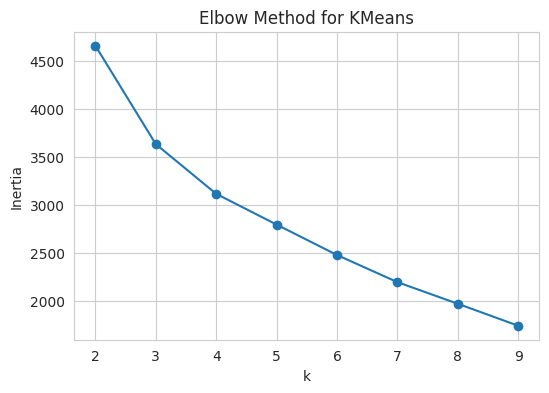

Silhouette (KMeans): 0.3629386237176031
Silhouette (DBSCAN): 0.464241020027627


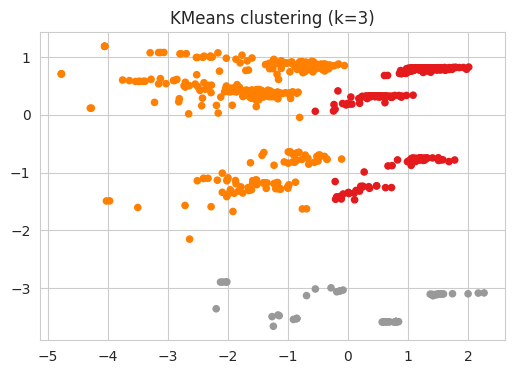

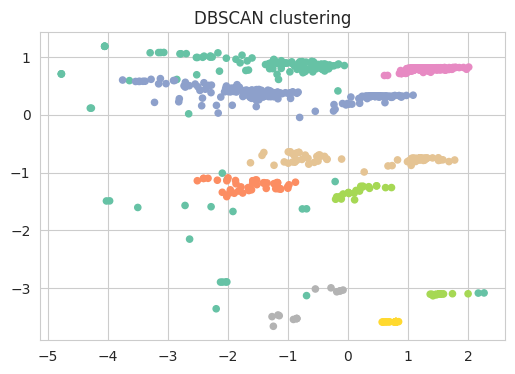

True Pclass,1,2,3
Cluster,,,
0,99,95,266
1,110,80,149
2,2,3,72


In [35]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

df = sns.load_dataset("titanic").copy()
df = df.drop(columns=["deck"])
df = df[df["fare"] > 0]
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

df["family_size"] = df["sibsp"] + df["parch"] + 1
df["is_alone"] = (df["family_size"] == 1).astype(int)
df = pd.get_dummies(df, columns=["sex", "embarked"], drop_first=True)

features = ["fare", "age", "family_size", "is_alone", "sex_male", "embarked_Q", "embarked_S"]
X = df[features].copy()
y_true = df["pclass"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, n_init=10, random_state=0)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(2, 10), inertias, marker='o')
plt.title("Elbow Method for KMeans")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
k_labels = kmeans.fit_predict(X_scaled)
print("Silhouette (KMeans):", silhouette_score(X_scaled, k_labels))

dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)
print("Silhouette (DBSCAN):", silhouette_score(X_scaled, db_labels))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=k_labels, cmap='Set1', s=20)
plt.title("KMeans clustering (k=3)")
plt.show()

plt.scatter(X_pca[:,0], X_pca[:,1], c=db_labels, cmap='Set2', s=20)
plt.title("DBSCAN clustering")
plt.show()

pd.crosstab(k_labels, y_true, rownames=["Cluster"], colnames=["True Pclass"])


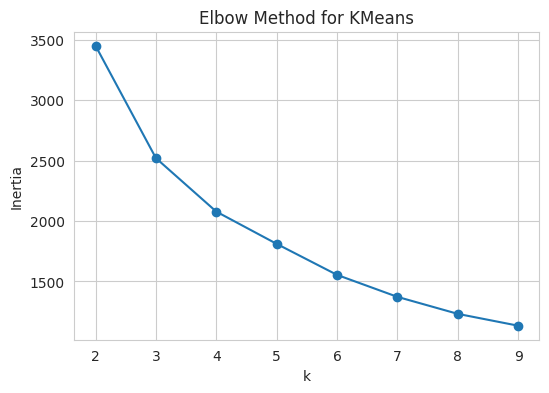

Silhouette (KMeans): 0.3970200858395172
Silhouette (DBSCAN): 0.17710973776350755
Silhouette (GMM): 0.33536717779471853


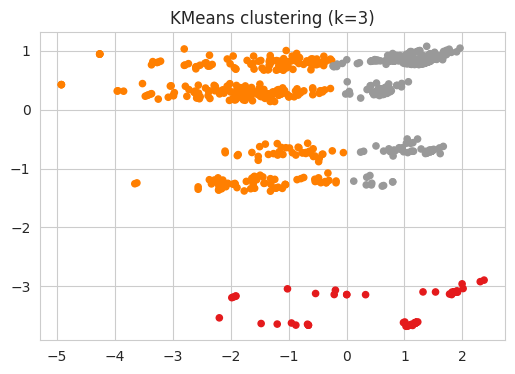

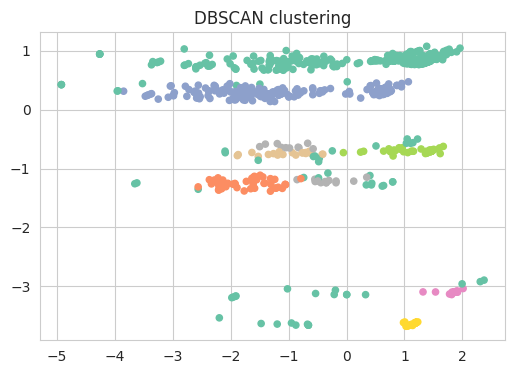

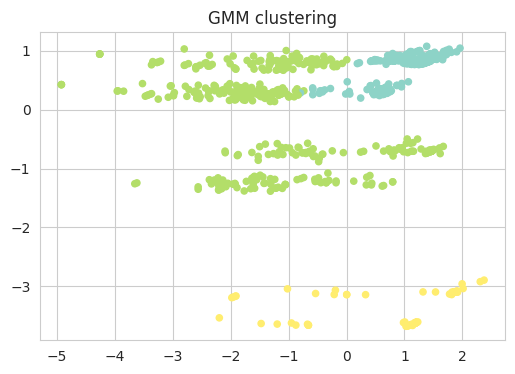

True Pclass    1   2    3
Cluster                  
0              2   3   72
1            135  80  140
2             74  95  275


In [39]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

df = sns.load_dataset("titanic").copy()
df = df.drop(columns=["deck"])
df = df[df["fare"] > 0]
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

df["family_size"] = df["sibsp"] + df["parch"] + 1
df["is_alone"] = (df["family_size"] == 1).astype(int)
df["fare_log"] = np.log1p(df["fare"])
df = pd.get_dummies(df, columns=["sex", "embarked"], drop_first=True)

features = ["fare_log", "age", "family_size", "is_alone", "sex_male", "embarked_Q", "embarked_S"]
X = df[features].copy()
y_true = df["pclass"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_model = PCA(n_components=4)
X_pca = pca_model.fit_transform(X_scaled)

inertias = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, n_init=10, random_state=0)
    km.fit(X_pca)
    inertias.append(km.inertia_)

plt.plot(range(2, 10), inertias, marker='o')
plt.title("Elbow Method for KMeans")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
k_labels = kmeans.fit_predict(X_pca)
print("Silhouette (KMeans):", silhouette_score(X_pca, k_labels))

dbscan = DBSCAN(eps=0.8, min_samples=10)
db_labels = dbscan.fit_predict(X_pca)
print("Silhouette (DBSCAN):", silhouette_score(X_pca, db_labels))

gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(X_pca)
print("Silhouette (GMM):", silhouette_score(X_pca, gmm_labels))

X_vis = PCA(n_components=2).fit_transform(X_scaled)

plt.scatter(X_vis[:,0], X_vis[:,1], c=k_labels, cmap='Set1', s=20)
plt.title("KMeans clustering (k=3)")
plt.show()

plt.scatter(X_vis[:,0], X_vis[:,1], c=db_labels, cmap='Set2', s=20)
plt.title("DBSCAN clustering")
plt.show()

plt.scatter(X_vis[:,0], X_vis[:,1], c=gmm_labels, cmap='Set3', s=20)
plt.title("GMM clustering")
plt.show()

print(pd.crosstab(k_labels, y_true, rownames=["Cluster"], colnames=["True Pclass"]))


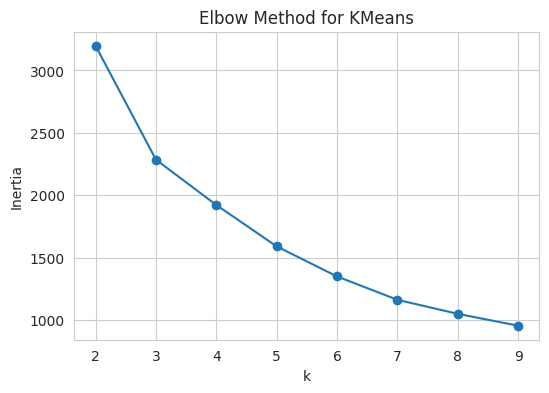

Silhouette (KMeans): 0.40567073877181925
Silhouette (DBSCAN): 0.4300158755928226
Silhouette (GMM): 0.40567073877181925


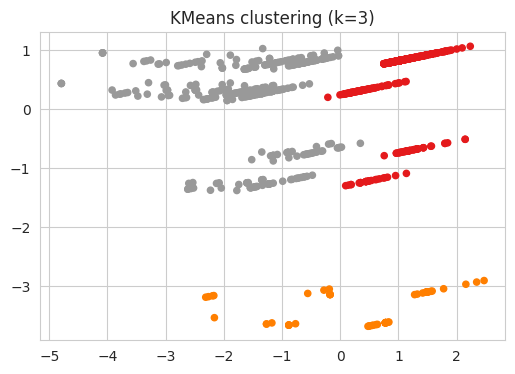

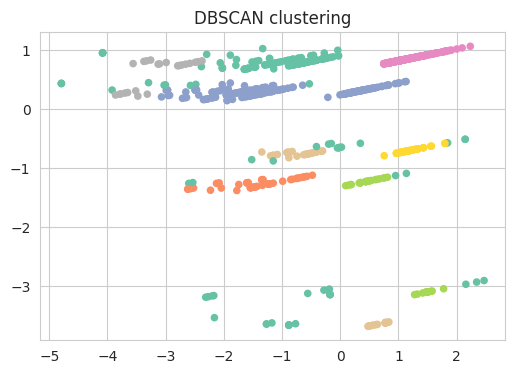

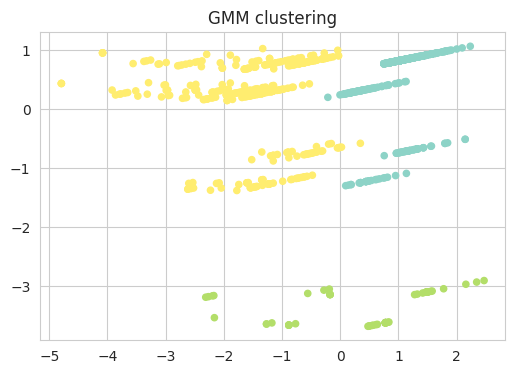

True Pclass    1   2    3
Cluster                  
0            104  95  266
1              2   3   72
2            105  80  149


In [38]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Load and preprocess
df = sns.load_dataset("titanic").copy()
df = df.drop(columns=["deck"])
df = df[df["fare"] > 0]
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

# Feature engineering
df["family_size"] = df["sibsp"] + df["parch"] + 1
df["is_alone"] = (df["family_size"] == 1).astype(int)
df = pd.get_dummies(df, columns=["sex", "embarked"], drop_first=True)

# Feature selection (fare removed)
features = ["age", "family_size", "is_alone", "sex_male", "embarked_Q", "embarked_S"]
X = df[features].copy()
y_true = df["pclass"]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca_model = PCA(n_components=4)
X_pca = pca_model.fit_transform(X_scaled)

# --- KMeans with PCA ---
inertias = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, n_init=10, random_state=0)
    km.fit(X_pca)
    inertias.append(km.inertia_)

plt.plot(range(2, 10), inertias, marker='o')
plt.title("Elbow Method for KMeans")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

# Choose k=3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
k_labels = kmeans.fit_predict(X_pca)
print("Silhouette (KMeans):", silhouette_score(X_pca, k_labels))

# --- DBSCAN tuned ---
dbscan = DBSCAN(eps=0.8, min_samples=10)
db_labels = dbscan.fit_predict(X_pca)
print("Silhouette (DBSCAN):", silhouette_score(X_pca, db_labels))

# --- GMM clustering ---
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(X_pca)
print("Silhouette (GMM):", silhouette_score(X_pca, gmm_labels))

# --- PCA for 2D Visualization ---
X_vis = PCA(n_components=2).fit_transform(X_scaled)

plt.scatter(X_vis[:,0], X_vis[:,1], c=k_labels, cmap='Set1', s=20)
plt.title("KMeans clustering (k=3)")
plt.show()

plt.scatter(X_vis[:,0], X_vis[:,1], c=db_labels, cmap='Set2', s=20)
plt.title("DBSCAN clustering")
plt.show()

plt.scatter(X_vis[:,0], X_vis[:,1], c=gmm_labels, cmap='Set3', s=20)
plt.title("GMM clustering")
plt.show()

# Optional: check alignment with true pclass
print(pd.crosstab(k_labels, y_true, rownames=["Cluster"], colnames=["True Pclass"]))


Silhouette (Agglomerative): 0.4186846724166299


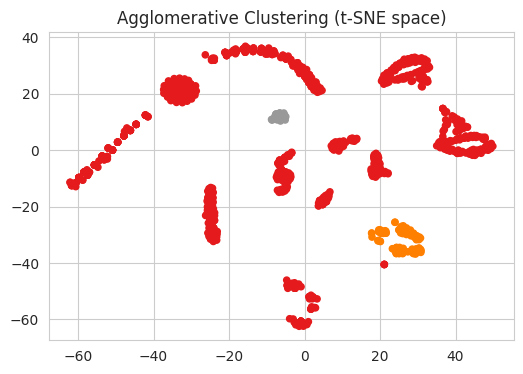

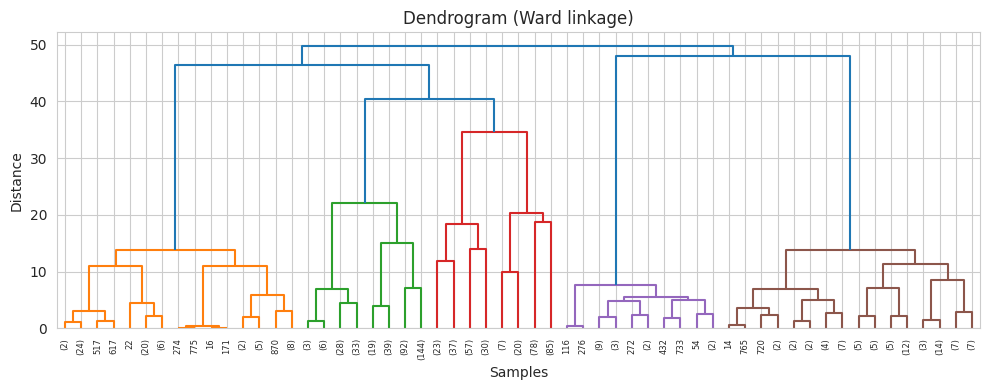

True Pclass    1    2    3
Cluster                   
0            191  156  429
1              6   19   53
2             14    3    5


In [40]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

# Load and preprocess
df = sns.load_dataset("titanic").copy()
df = df.drop(columns=["deck"])
df = df[df["fare"] > 0]
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

# Feature engineering
df["family_size"] = df["sibsp"] + df["parch"] + 1
df["is_alone"] = (df["family_size"] == 1).astype(int)
df["age_group"] = pd.cut(df["age"], bins=[0, 15, 60, 100], labels=["child", "adult", "senior"])
df = pd.get_dummies(df, columns=["sex", "embarked", "age_group"], drop_first=True)

# Feature selection (no fare)
features = ["age", "family_size", "is_alone", "sex_male", "embarked_Q", "embarked_S",
            "age_group_adult", "age_group_senior"]
X = df[features].copy()
y_true = df["pclass"]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Agglomerative Clustering ---
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled)
print("Silhouette (Agglomerative):", silhouette_score(X_scaled, agg_labels))

# --- t-SNE for 2D Visualization ---
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=agg_labels, cmap='Set1', s=20)
plt.title("Agglomerative Clustering (t-SNE space)")
plt.show()

# --- Dendrogram ---
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 4))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Dendrogram (Ward linkage)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Optional: compare clusters to true class
print(pd.crosstab(agg_labels, y_true, rownames=["Cluster"], colnames=["True Pclass"]))


Silhouette (GMM): 0.37055378154377755


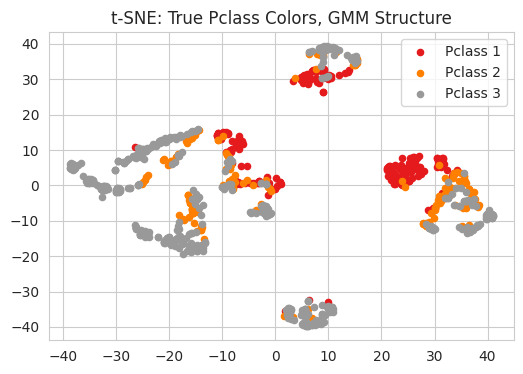

True Pclass   1   2    3
Cluster                 
0            72  85  297
1            94  76  144
2            45  17   46


In [48]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

# Load and preprocess
df = sns.load_dataset("titanic").copy()
df = df.drop(columns=["deck"])
df = df[df["fare"] > 0]
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
df.dropna(subset=["survived"], inplace=True)

# Feature engineering
df["fare_log_scaled"] = np.log1p(df["fare"]) * 0.3

# Encode categorical
df = pd.get_dummies(df, columns=["sex"], drop_first=True)

# Feature selection
features = ["survived", "age", "fare_log_scaled", "sex_male"]
X = df[features].copy()
y_true = df["pclass"]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- GMM clustering ---
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(X_scaled)
print("Silhouette (GMM):", silhouette_score(X_scaled, gmm_labels))

# --- t-SNE visualization ---
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

unique_classes = np.unique(y_true)
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_classes)))

plt.figure()
for i, pclass in enumerate(unique_classes):
    mask = y_true == pclass
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                s=20, color=colors[i], label=f"Pclass {pclass}")

plt.title("t-SNE: True Pclass Colors, GMM Structure")
plt.legend()
plt.show()



# Optional: check alignment with true class
print(pd.crosstab(gmm_labels, y_true, rownames=["Cluster"], colnames=["True Pclass"]))

Silhouette (GMM): 0.5328323393693293


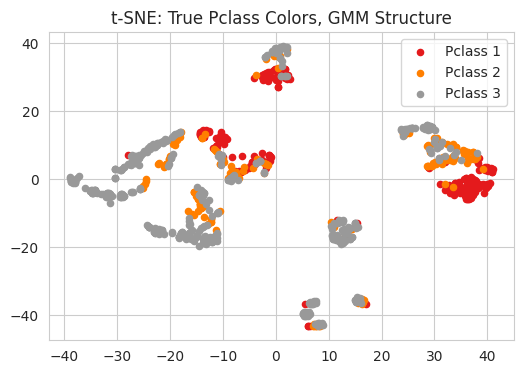

True Pclass    1   2    3
Cluster                  
0            116  99  374
1             90  60   59
2              5  19   54


In [49]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

# Load and preprocess
df = sns.load_dataset("titanic").copy()
df = df.drop(columns=["deck"])
df = df[df["fare"] > 0]
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
df.dropna(subset=["survived"], inplace=True)

# Feature engineering
df["fare_log"] = np.log1p(df["fare"])
df["fare_log_scaled"] = df["fare_log"] * 0.3
df["female_survival_boost"] = ((df["sex"] == "female") & (df["survived"] == 1)).astype(int)
df["is_child"] = (df["age"] < 15).astype(int)
df["survival_favored"] = ((df["sex"] == "female") | (df["age"] < 15)).astype(int)

# Encode categorical
df = pd.get_dummies(df, columns=["sex"], drop_first=True)

# Feature selection
features = [
    "survived", "age", "fare_log_scaled", "sex_male",
    "female_survival_boost", "is_child", "survival_favored"
]
X = df[features].copy()
y_true = df["pclass"]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- GMM clustering ---
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(X_scaled)
print("Silhouette (GMM):", silhouette_score(X_scaled, gmm_labels))

# --- t-SNE visualization with true pclass coloring ---
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

unique_classes = np.unique(y_true)
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_classes)))

plt.figure()
for i, pclass in enumerate(unique_classes):
    mask = y_true == pclass
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                s=20, color=colors[i], label=f"Pclass {pclass}")

plt.title("t-SNE: True Pclass Colors, GMM Structure")
plt.legend()
plt.show()

# Optional: check alignment with true class
print(pd.crosstab(gmm_labels, y_true, rownames=["Cluster"], colnames=["True Pclass"]))
